# Exploration of incidents dataset

In [1]:
import psycopg2
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_connection(schema="build_1_3_0"):
    
    conn = psycopg2.connect("dbname='proj001_lfb' user='postgres' "
                            "host='10.152.234.53'")
    if schema:
        cur = conn.cursor()
        query = "SET search_path TO {}".format(schema)
        cur.execute(query)
        
    return conn

# Import data
Note the code is now using a cleaned pipeline file from version `0.0.1` of the pipeline instead of the raw data file in `inputs`. 

In [4]:
conn = get_connection()
qry = ('select * '
           'from proj001_lfb_0_0_1.l2_incidents limit 500;' )
#data = pd.read_sql(qry, conn).drop(['store_no','store_type'], axis=1)  
data = pd.read_sql(qry, conn)  

In [5]:
data.head(10)

,incidentnumber_cln,dateofcall_cln,incidentgroup,stopcodedescription,specialservicetype,propertycategory,propertytype,addressqualifier,postcode_full,incgeo_boroughname,incgeo_wardname,incgeo_wardnamenew,easting_m,northing_m,frs,incidentstationground,numstationswithpumpsattending,numpumpsattending
0,235138081,2009-01-01 00:00:37+00:00,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,WANDSWORTH,QUEENSTOWN,QUEENSTOWN,528652,176830,LONDON,BATTERSEA,2.0,2.0
1,1091,2009-01-01 00:00:46+00:00,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,LAMBETH,BISHOP'S,BISHOP'S,530485,179007,LONDON,LAMBETH,NaN,NaN
2,2091,2009-01-01 00:03:00+00:00,Fire,Secondary Fire,None,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,ENFIELD,HASELBURY,HASELBURY,533773,194492,LONDON,EDMONTON,1.0,1.0
3,3091,2009-01-01 00:04:27+00:00,Fire,Secondary Fire,None,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,HILLINGDON,HILLINGDON EAST,HILLINGDON EAST,507738,182805,LONDON,HILLINGDON,1.0,1.0
4,5091,2009-01-01 00:05:39+00:00,Fire,Secondary Fire,None,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,ISLINGTON,HOLLOWAY,HOLLOWAY,531058,185307,LONDON,HOLLOWAY,1.0,2.0
5,6091,2009-01-01 00:06:03+00:00,False Alarm,AFA,None,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,None,CAMDEN,KENTISH TOWN,KENTISH TOWN,NULL,NULL,LONDON,KENTISH TOWN,1.0,2.0
6,8091,2009-01-01 00:12:31+00:00,Special Service,Special Service,RTC,Road Vehicle,Car,On motorway / elevated road,SE3 9PP,GREENWICH,ELTHAM WEST,ELTHAM WEST,541086,175646,LONDON,LEE GREEN,1.0,1.0
7,9091,2009-01-01 00:13:42+00:00,Fire,Secondary Fire,None,Outdoor Structure,Refuse/rubbish tip,On land associated with building,TW3 2RE,HOUNSLOW,HOUNSLOW SOUTH,HOUNSLOW SOUTH,514529,174907,LONDON,HESTON,1.0,2.0
8,10091,2009-01-01 00:14:51+00:00,Fire,Secondary Fire,None,Outdoor Structure,Small refuse/rubbish container,On land associated with building,EC1V 7PB,ISLINGTON,BUNHILL,BUNHILL,531902,182654,LONDON,SHOREDITCH,1.0,1.0
9,11091,2009-01-01 00:14:57+00:00,False Alarm,AFA,None,Other Residential,Student Hall of Residence,Correct incident location,WC1B 3RA,CAMDEN,BLOOMSBURY,BLOOMSBURY,529914,181705,LONDON,SOHO,1.0,1.0


About the expected number of days for 4 years

In [7]:
qry = ('select count (distinct dateofcall_cln) '
           'from proj001_lfb_0_0_1.l2_incidents;' )
#data = pd.read_sql(qry, conn).drop(['store_no','store_type'], axis=1)  
data = pd.read_sql(qry, conn)  
data

,count
0,484064


# What types of incident occur?

In [8]:
qry = ('select incidentgroup,count (*) '
           'from proj001_lfb_0_0_1.l2_incidents '
           'group by incidentgroup '
           'order by count(*) desc;' )
#data = pd.read_sql(qry, conn).drop(['store_no','store_type'], axis=1)  
data = pd.read_sql(qry, conn)  
data

,incidentgroup,count
0,False Alarm,234385
1,Special Service,144987
2,Fire,105684


# How many incidents over time?
Note because we are now use a pipeline dataset instead of a raw dataset, we no longer have to clean the dataofcall field in this notebook. Our code is simplified and more efficient

In [30]:
qry = ("select dateofcall_cln::date, incidentgroup, count(*) "
           "from proj001_lfb_0_0_1.l2_incidents "
           "group by dateofcall_cln::date, incidentgroup "
           "order by dateofcall_cln::date asc "
           ";" )

data = pd.read_sql(qry, conn)  
data.head()

,dateofcall_cln,incidentgroup,count
0,2009-01-01,False Alarm,165
1,2009-01-01,Fire,107
2,2009-01-01,Special Service,135
3,2009-01-02,False Alarm,134
4,2009-01-02,Fire,74


However we still have to do type conversions after reading into pandas dataframes

In [31]:
data.dtypes

dateofcall_cln    object
incidentgroup     object
count              int64
dtype: object

In [32]:
data['dateofcall_cln'] = pd.to_datetime(data['dateofcall_cln'])
data = data.sort_values('dateofcall_cln')
data.head()

,dateofcall_cln,incidentgroup,count
0,2009-01-01,False Alarm,165
1,2009-01-01,Fire,107
2,2009-01-01,Special Service,135
3,2009-01-02,False Alarm,134
4,2009-01-02,Fire,74


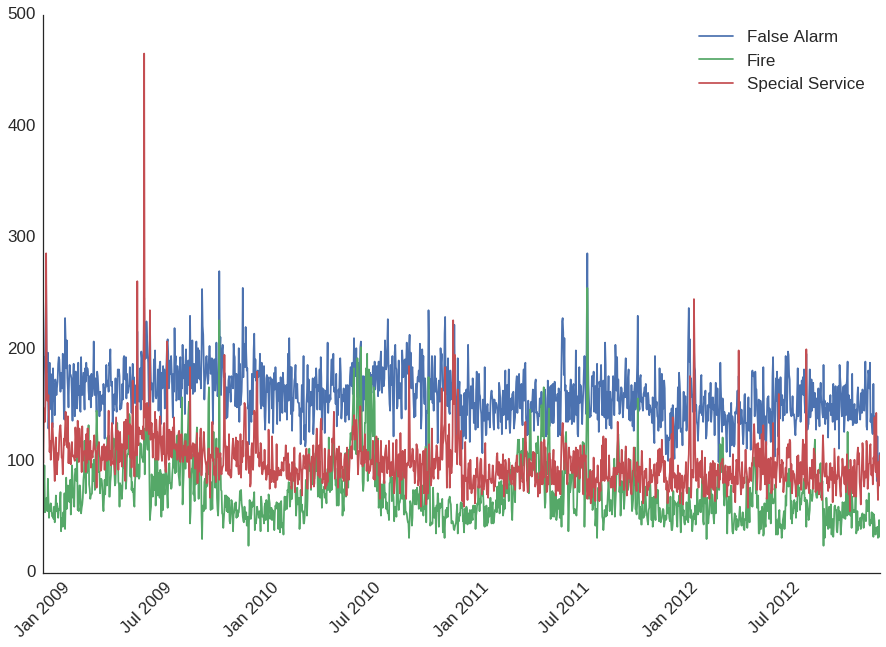

In [33]:
# sns.tsplot(time="dateofcall_cln", value="count", condition="incidentgroup",data=data)
sns.set(style='white', font_scale=1.7)

fig, ax= plt.subplots(figsize=(15,10))
incident_types = data.incidentgroup.unique()

for incident in incident_types:
    subdata = data[data.incidentgroup==incident]
    ax.plot( subdata['dateofcall_cln'], subdata['count'], label=incident)
plt.legend()
sns.despine()
plt.xticks(rotation=45)
plt.show()

# Which were the worst days?

In [34]:
data.sort_values('count', ascending=False).head(5)

,dateofcall_cln,incidentgroup,count
533,2009-06-27,Special Service,465
2850,2011-08-09,False Alarm,286
20,2009-01-07,Special Service,286
924,2009-11-05,False Alarm,270
497,2009-06-15,Special Service,261
